In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [3]:
import os
import cv2
import numpy as np

def load_and_preprocess_images(folder_path, image_size):
    images = []
    labels = []

    for label, class_name in enumerate(["Bengin cases", "Normal cases"]):
        class_folder = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            image = cv2.resize(image, image_size)
            image = image / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

# Define paths to your dataset folders
cancer_images_path = "/content/drive/My Drive/dtst/"
normal_images_path = "/content/drive/My Drive/dtst/"

# Define image dimensions
image_size = (224, 224)

# Load and preprocess cancer images
cancer_images, cancer_labels = load_and_preprocess_images(cancer_images_path, image_size)

# Load and preprocess normal images
normal_images, normal_labels = load_and_preprocess_images(normal_images_path, image_size)

# Combine the datasets
all_images = np.concatenate((cancer_images, normal_images), axis=0)
all_labels = np.concatenate((cancer_labels, normal_labels), axis=0)

In [4]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add a Global Average Pooling layer to the model
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create a new model with the added layers
feature_extraction_model = Model(inputs=base_model.input, outputs=x)

# Extract features from your preprocessed image data
features = feature_extraction_model.predict(all_images)

34/34 [==============================] - 616s 18s/step


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, all_labels, test_size=0.3, random_state=42)

print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])

Number of training samples: 757
Number of testing samples: 325


In [6]:
print(X_train.shape)

(757, 512)


In [7]:
# Simple Feedforward Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout

model1 = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.9),
    Dense(128, activation='Softmax'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

history=model1.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
48/48 [==============================] - 2s 16ms/step - loss: 0.6904 - accuracy: 0.5812 - val_loss: 0.6895 - val_accuracy: 0.7446
Epoch 2/20
48/48 [==============================] - 0s 9ms/step - loss: 0.6884 - accuracy: 0.6169 - val_loss: 0.6879 - val_accuracy: 0.7446
Epoch 3/20
48/48 [==============================] - 1s 11ms/step - loss: 0.6857 - accuracy: 0.6631 - val_loss: 0.6867 - val_accuracy: 0.7446
Epoch 4/20
48/48 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.6658 - val_loss: 0.6856 - val_accuracy: 0.7446
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.6830 - val_loss: 0.6847 - val_accuracy: 0.7446
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 0.6820 - accuracy: 0.7133 - val_loss: 0.6838 - val_accuracy: 0.7446
Epoch 7/20
48/48 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.7094 - val_loss: 0.6830 - val_accuracy: 0.7446
Epoch 8/20
48/48 

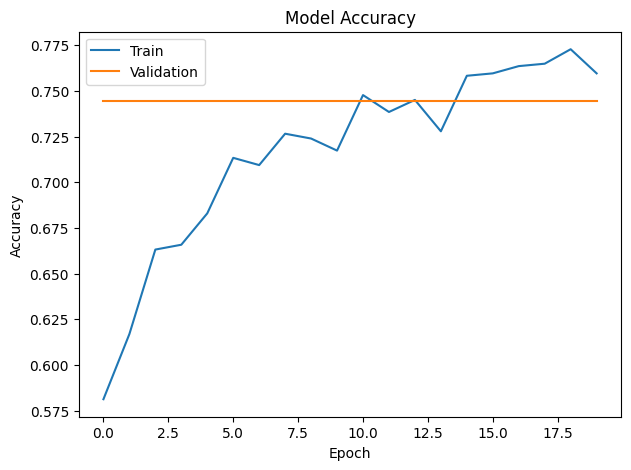

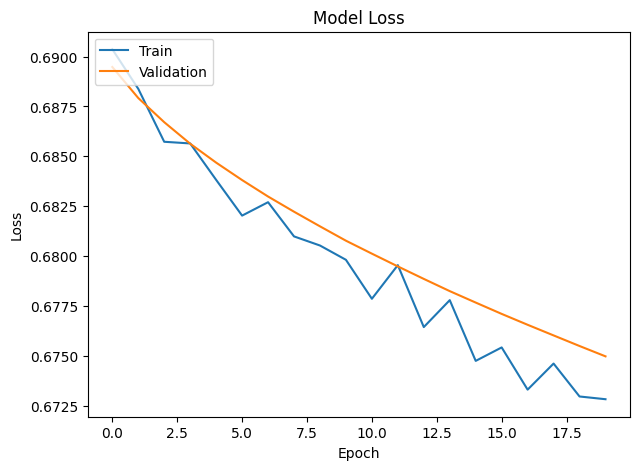

In [8]:

# Plot training & validation accuracy values
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# In-built MLP Model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation='relu', random_state=42)

mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print("MLP Accuracy:", accuracy)

MLP Accuracy: 0.9723076923076923


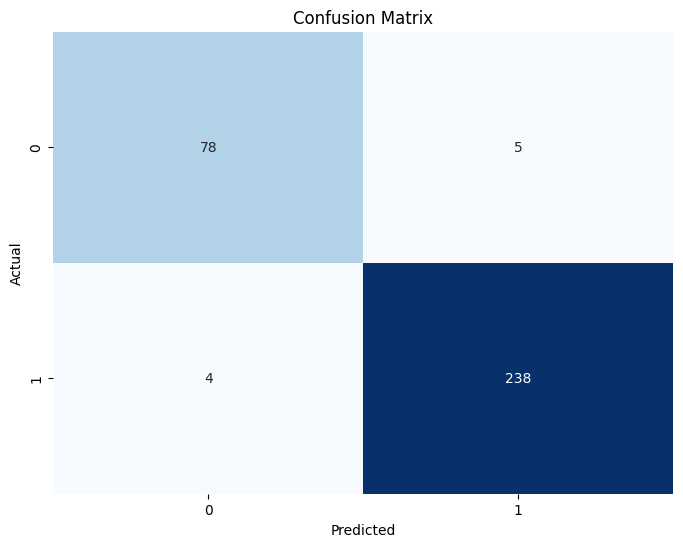

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        83
           1       0.98      0.98      0.98       242

    accuracy                           0.97       325
   macro avg       0.97      0.96      0.96       325
weighted avg       0.97      0.97      0.97       325



In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

In [11]:
# MLP Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 41281 (161.25 KB)
Trainable params: 41281 (161.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Import necessary packages
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train and evaluate MLP model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])
#mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)


Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 0.6115 - accuracy: 0.7107 - val_loss: 0.5152 - val_accuracy: 0.7895
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.5694 - accuracy: 0.7719 - val_loss: 0.5240 - val_accuracy: 0.7895
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7736 - val_loss: 0.5101 - val_accuracy: 0.7895
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.7752 - val_loss: 0.5101 - val_accuracy: 0.7895
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.7769 - val_loss: 0.5082 - val_accuracy: 0.7895
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.7769 - val_loss: 0.4994 - val_accuracy: 0.7895
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.7769 - val_loss: 0.5060 - val_accuracy: 0.7895
Epoch 8/10
19/19 [=

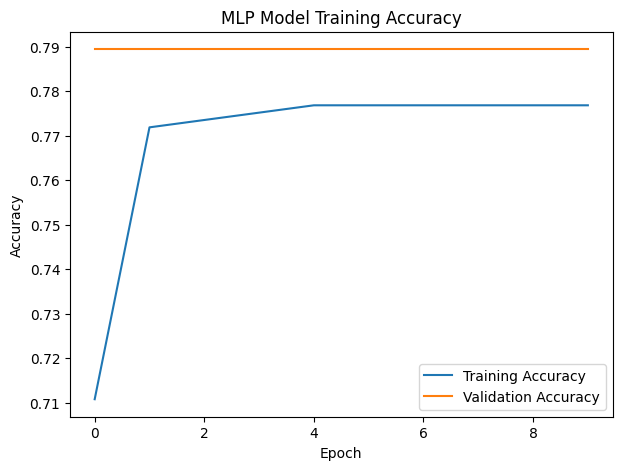

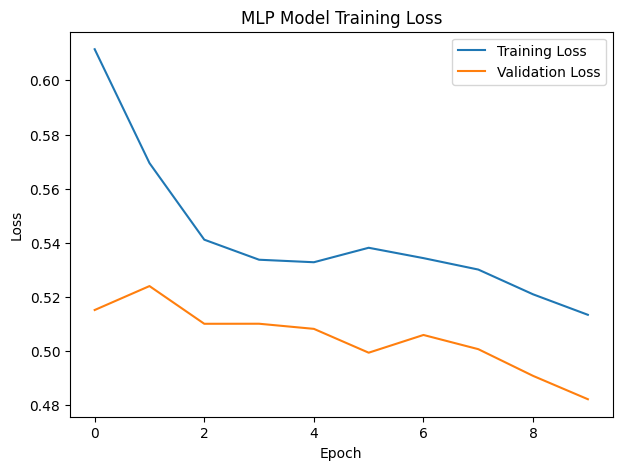

In [13]:
import matplotlib.pyplot as plt

# Plot training history for MLP model
plt.figure(figsize=(7, 5))
#plt.subplot(1, 3, 1)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(7, 5))
#plt.subplot(1, 3, 2)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


Accuracy of the MLP_Model: 0.7768595218658447
Accuracy of the SFNN_Model: 0.7595772743225098
Accuracy of the MLP Classifier: 0.9723076923076923

 



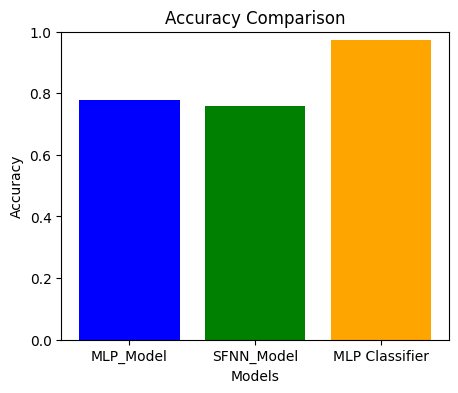

In [14]:
print("Accuracy of the MLP_Model:",(mlp_history.history['accuracy'][-1]))
print("Accuracy of the SFNN_Model:",(history.history['accuracy'][-1]))
accuracy = mlp.score(X_test, y_test)
print("Accuracy of the MLP Classifier:", accuracy)
print("\n \n")

import matplotlib.pyplot as plt

# Define the model names and their respective accuracies
model_names = ["MLP_Model", "SFNN_Model", "MLP Classifier"]
accuracies = [
    mlp_history.history['accuracy'][-1],
    history.history['accuracy'][-1],
    mlp.score(X_test, y_test)
]

# Create a bar plot
plt.figure(figsize=(5, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy range (0 to 1)
plt.show()


#Test

In [15]:
# Function to load and preprocess images from a directory
def load_and_preprocess_images_from_dir(directory, image_size):
    images = []
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        # Read the image file
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        # Convert to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Resize the image to the specified size
        image = cv2.resize(image, image_size)
        # Normalize pixel values
        image = image / 255.0
        images.append(image)
    # Convert list of images to numpy array
    return np.array(images)

In [16]:
# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Create a new model for feature extraction
feature_extraction_model = Model(inputs=base_model.input, outputs=x)

In [17]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.models import Model


In [18]:
# Define the directory containing the test images
test_directory = "/content/drive/MyDrive/dtst/test/"
# Define image dimensions
image_size = (224, 224)
# Load and preprocess the test images
test_images = load_and_preprocess_images_from_dir(test_directory, image_size)

In [19]:
# Load and preprocess the test images
from keras.applications.vgg16 import preprocess_input
test_images = []
for image_name in os.listdir(test_directory):
    image_path = os.path.join(test_directory, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)  # Preprocess the image for VGG16
    test_images.append(image)

In [20]:
test_images = load_and_preprocess_images_from_dir(test_directory, image_size)

In [21]:
# Extract features from the test images using the VGG16 model
test_features = feature_extraction_model.predict(test_images)

2/2 [==============================] - 42s 13s/step


In [27]:
# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation='relu', random_state=42)
# Load the trained MLP model weights
mlp = joblib.load("/content/drive/MyDrive/dtst/my_model.joblib")

In [28]:
# Predict using the in-built MLP model
predictions = mlp.predict(test_features)

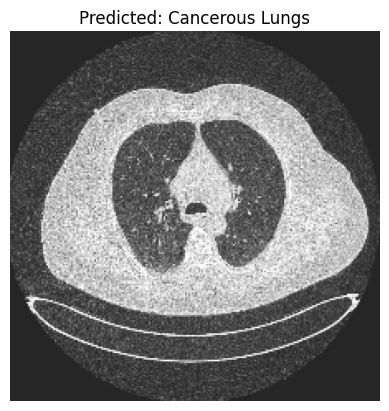

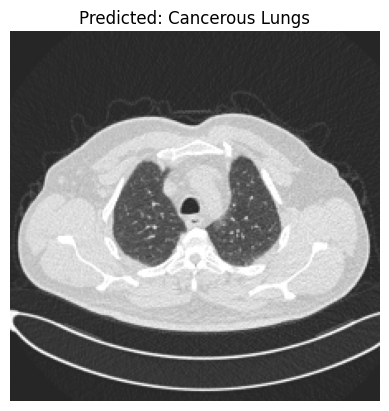

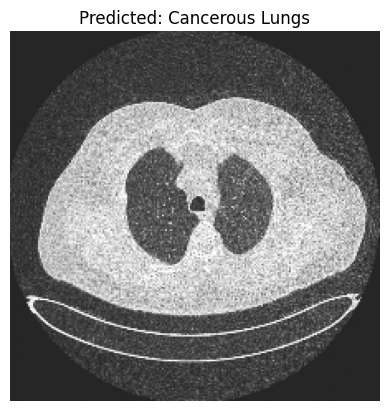

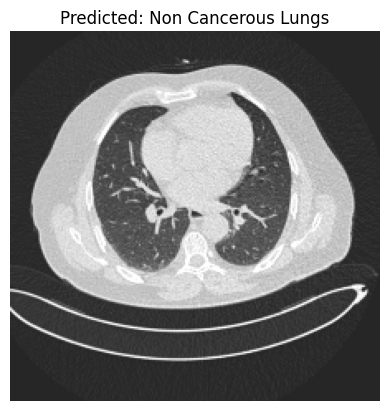

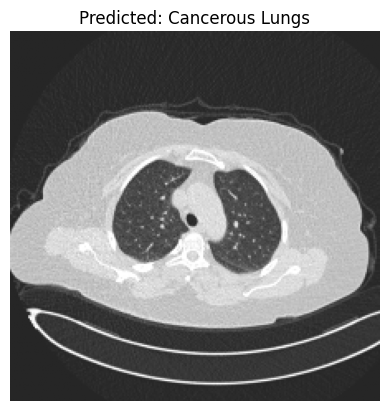

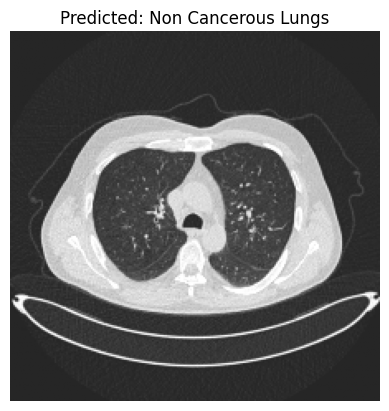

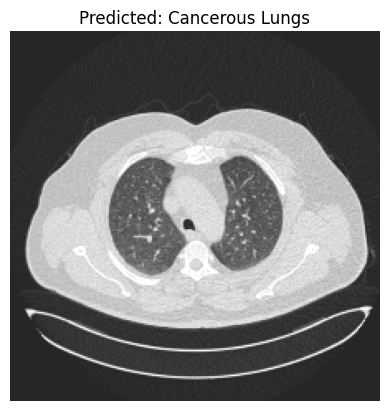

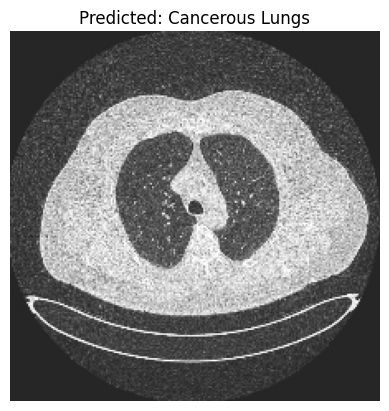

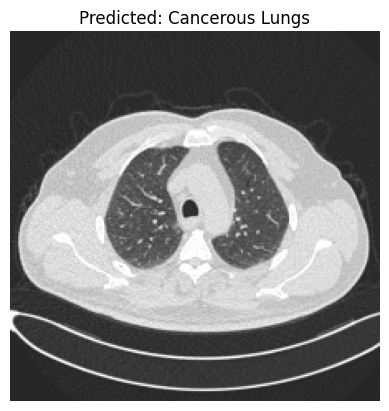

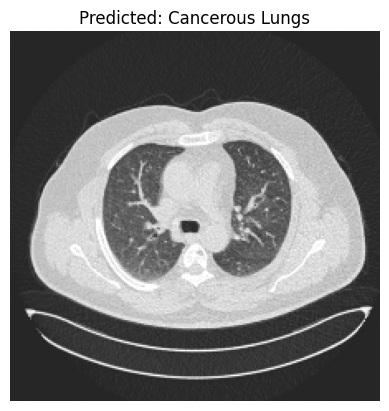

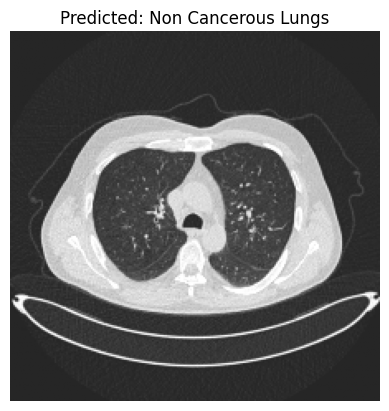

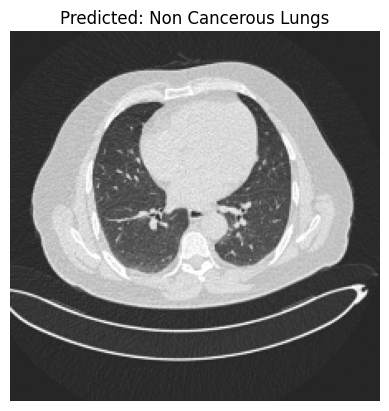

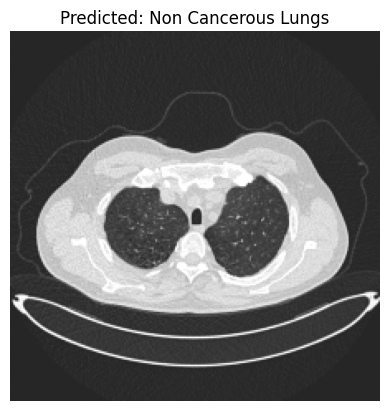

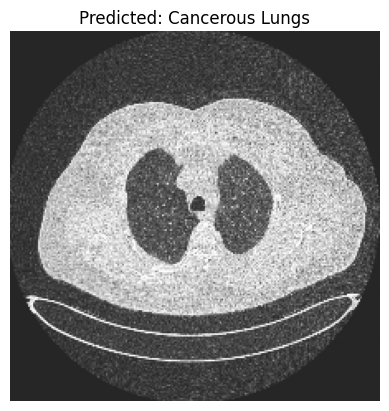

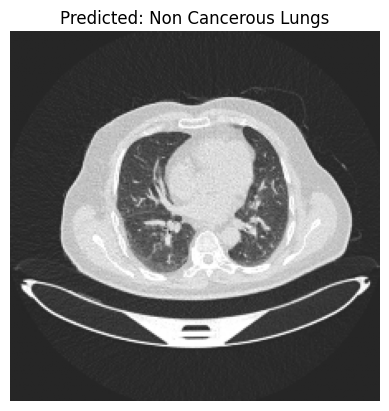

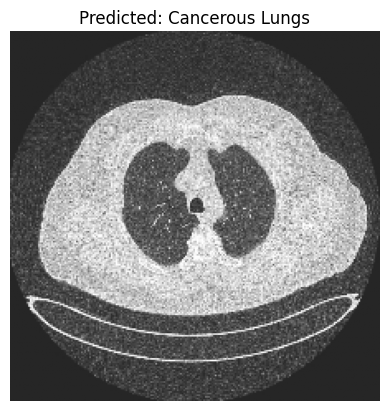

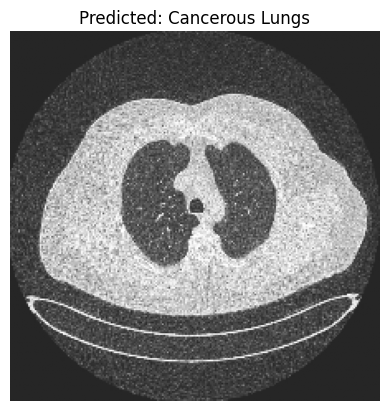

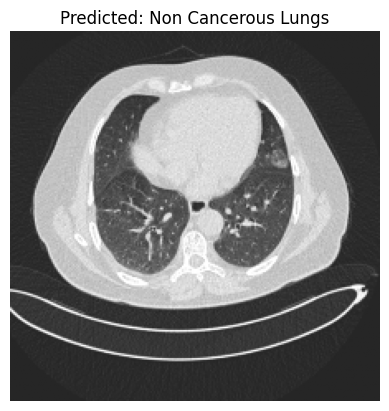

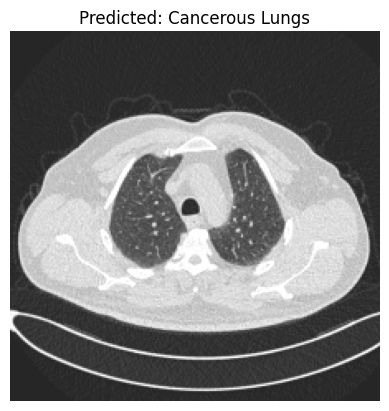

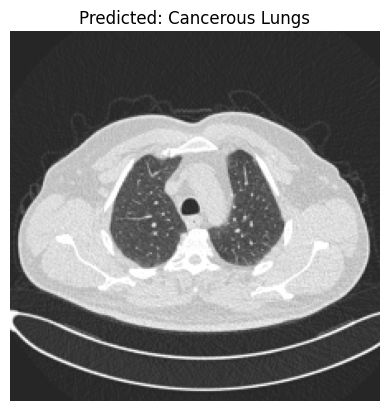

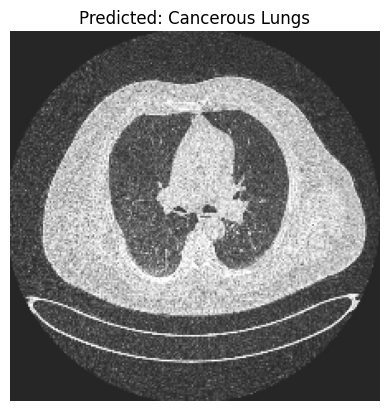

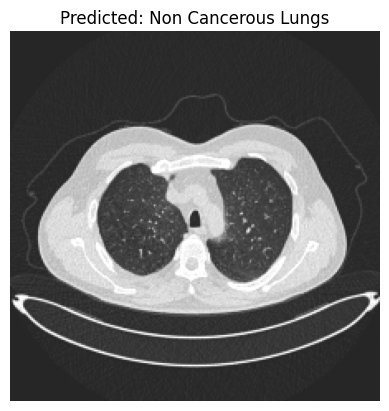

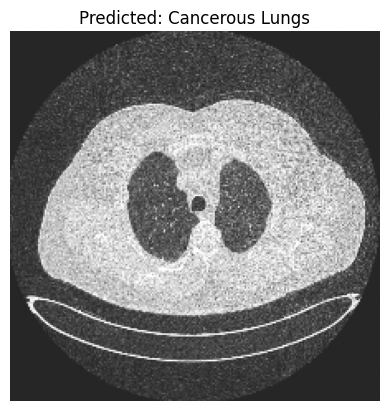

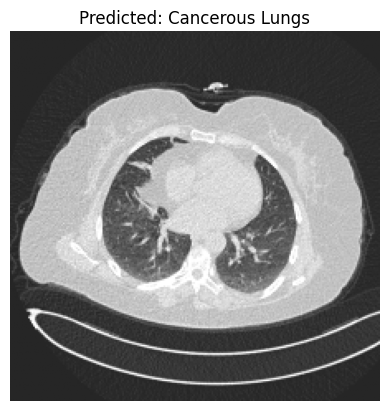

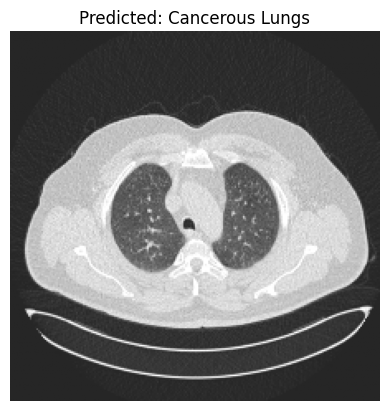

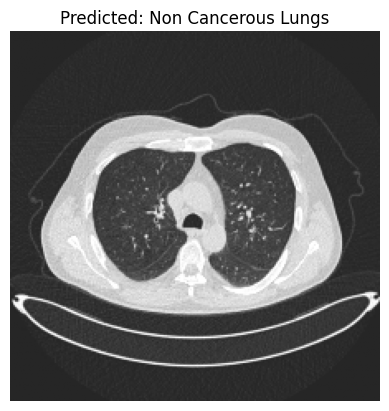

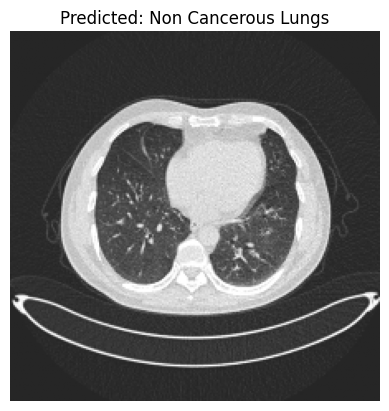

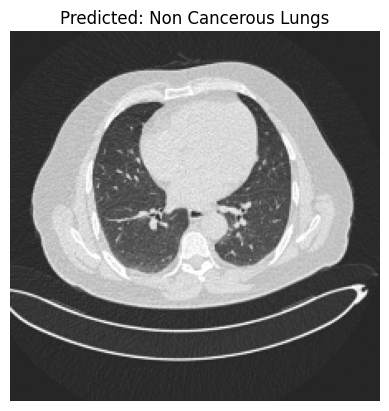

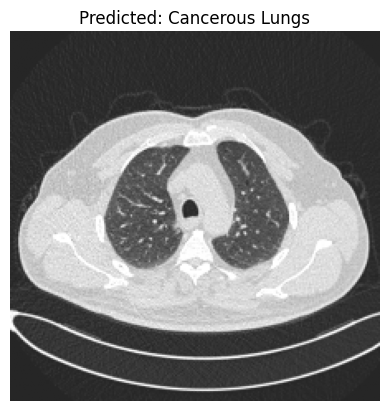

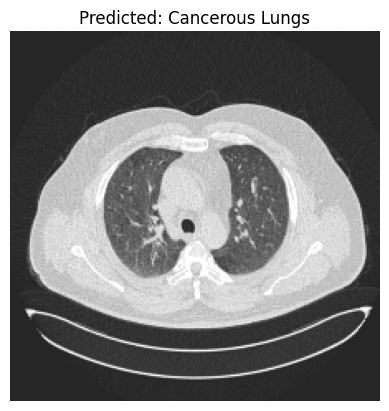

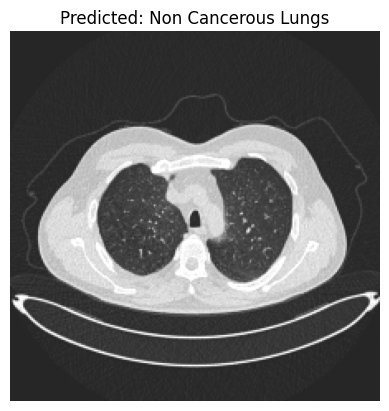

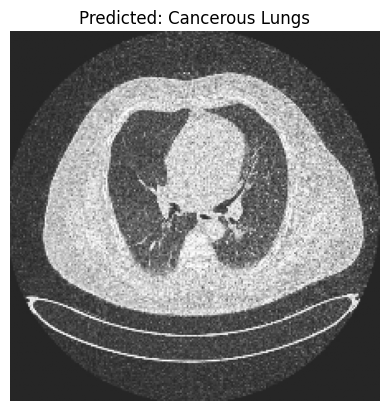

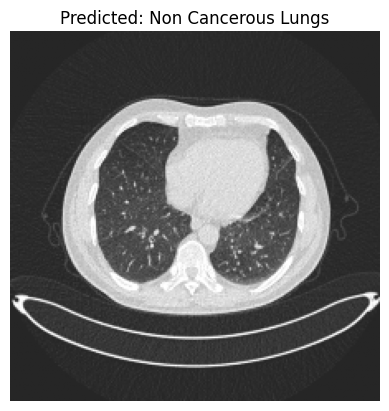

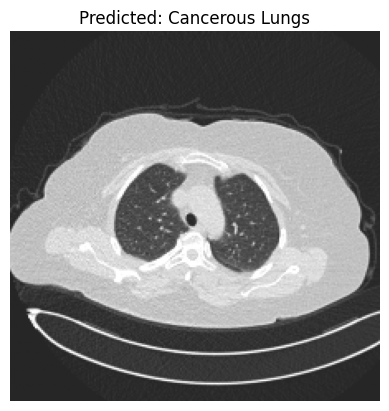

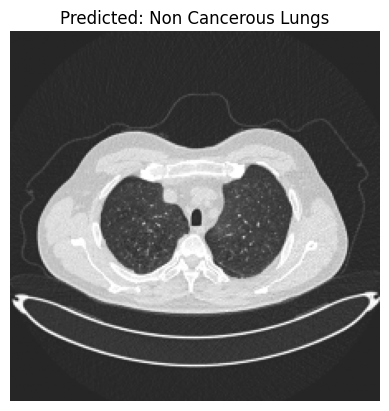

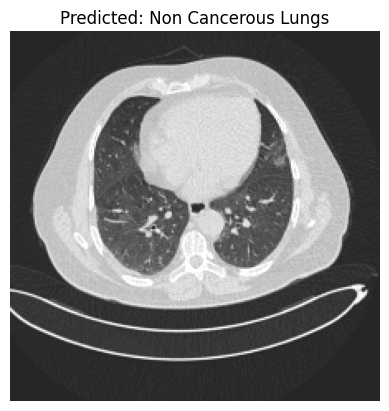

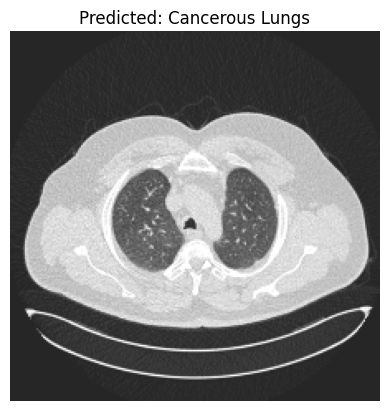

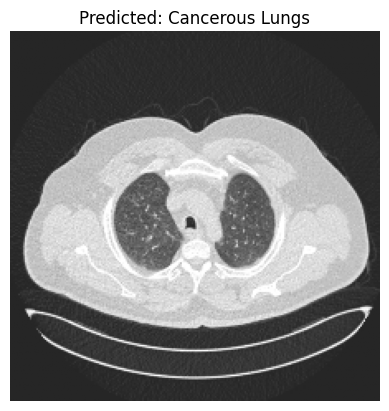

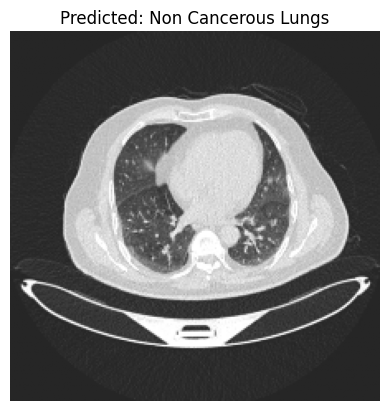

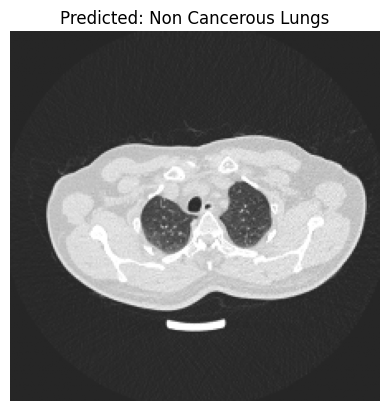

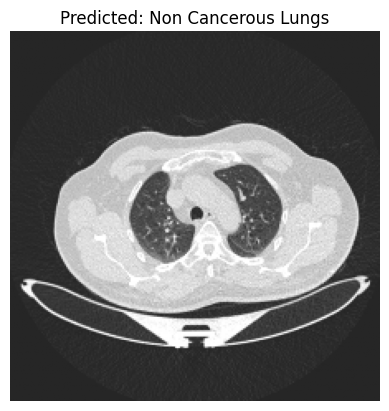

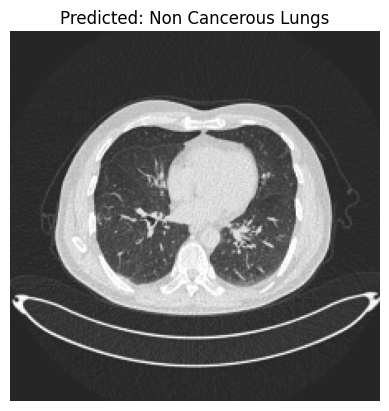

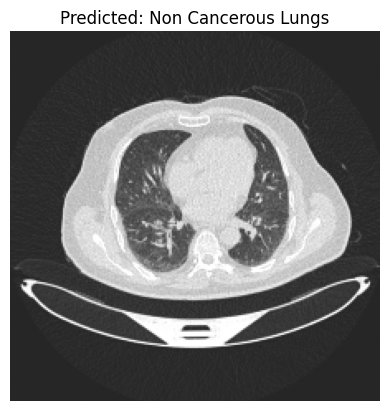

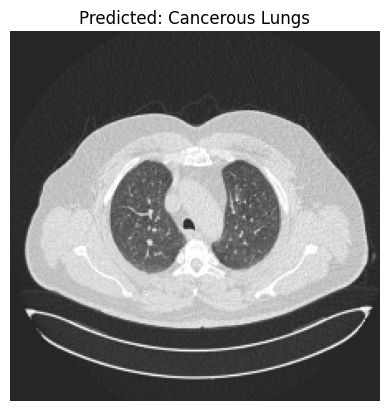

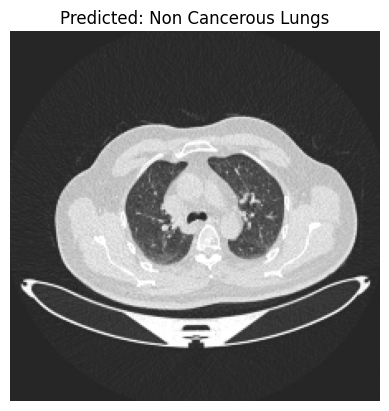

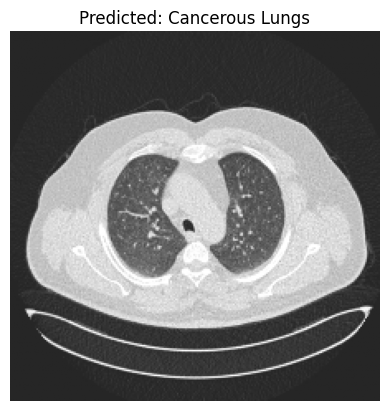

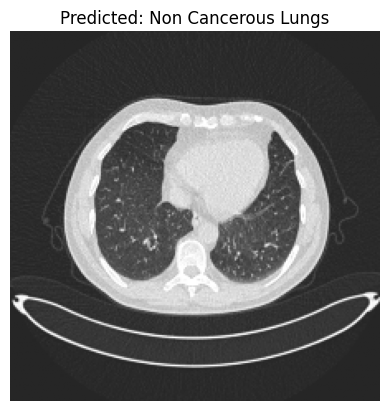

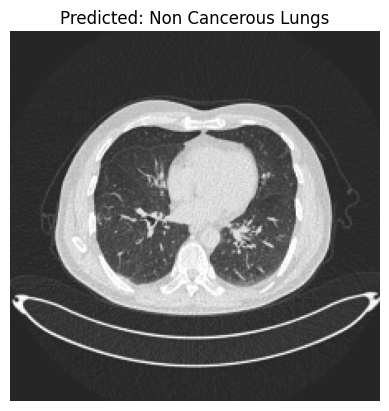

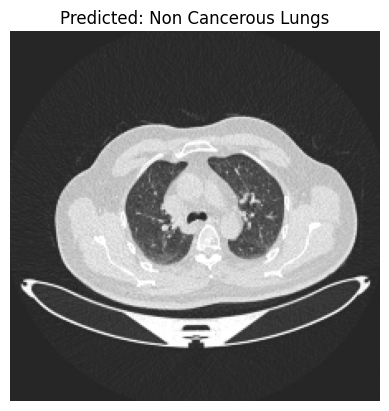

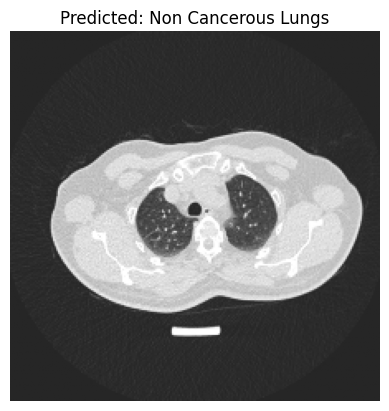

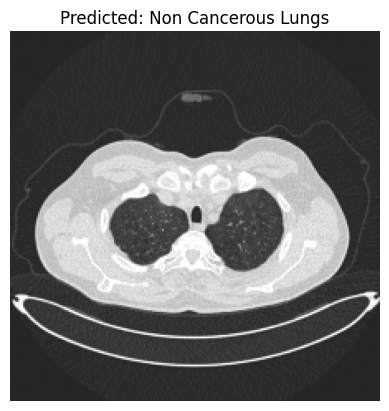

In [29]:
# Display the test images and prediction results
for i in range(len(test_images)):
    plt.imshow(test_images[i])
    if (predictions[i]==0):
      plt.title("Predicted: Non Cancerous Lungs")
    else:
      plt.title("Predicted: Cancerous Lungs")
    plt.axis('off')
    plt.show()